In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

Step 1 : Reading and understanding Train and Test Data set

In [2]:
train_original = pd.read_csv("/content/train_ctrUa4K.csv")
train = train_original
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.shape

(614, 13)

In [4]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Step3: Univariate Analysis

In [6]:
# looking for  the target variable distribution in the train data set
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: title={'center': 'Loan Status Bar Plot'}, xlabel='Loan Status Y - Yes or N- No', ylabel='Loan Status Count'>

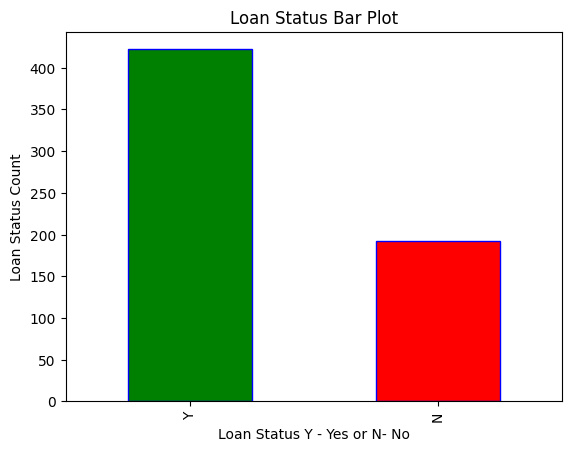

In [8]:
# Add title and axis names
plt.title('Loan Status Bar Plot')
plt.xlabel('Loan Status Y - Yes or N- No')
plt.ylabel('Loan Status Count')

train['Loan_Status'].value_counts().plot.bar(color=['green', 'red'],edgecolor='blue')

Study of categorical features such as Gender, Married, Self_Employed and Credit_History

<Axes: title={'center': 'Credit History'}>

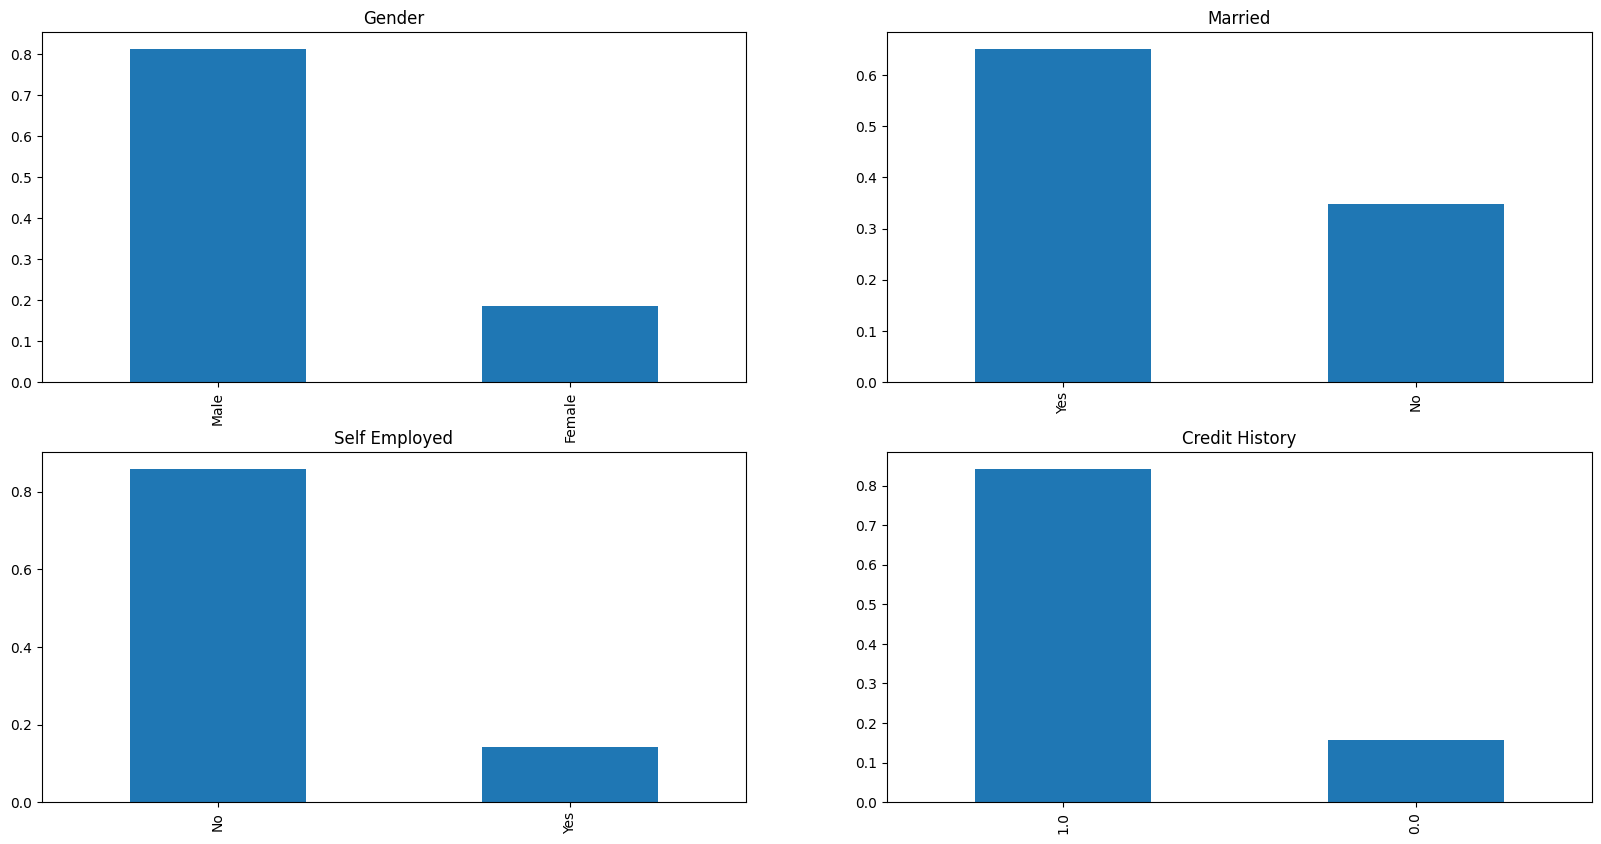

In [9]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

<Axes: title={'center': 'Property Area'}>

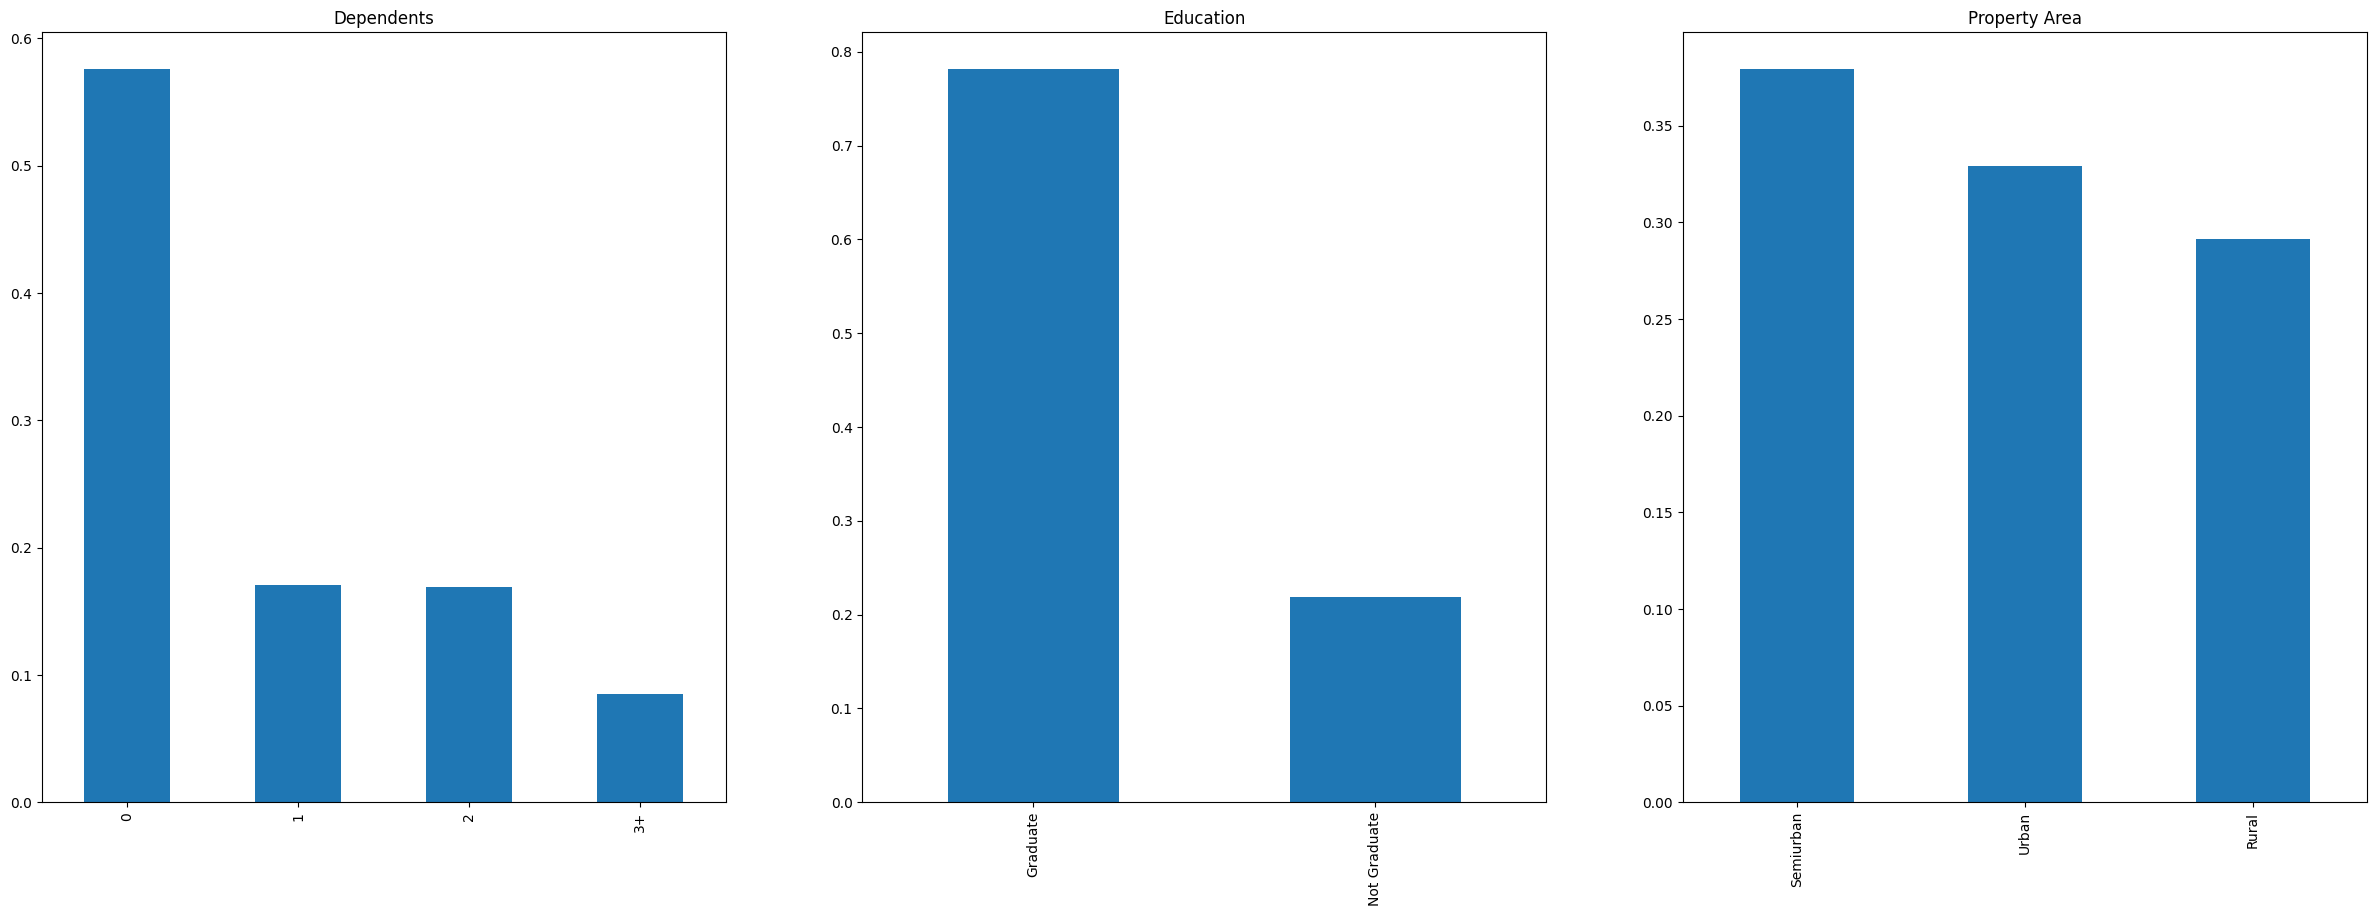

In [10]:
plt.figure(2)
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot(figsize=(30,10),kind='bar',title= 'Dependents')
plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot(kind='bar',title= 'Education')
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot(kind='bar',title= 'Property Area')

Independent Variable (Numerical)

<ipython-input-11-500bcdbf8e33>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'],label="Applicant Income analysis")


<Axes: >

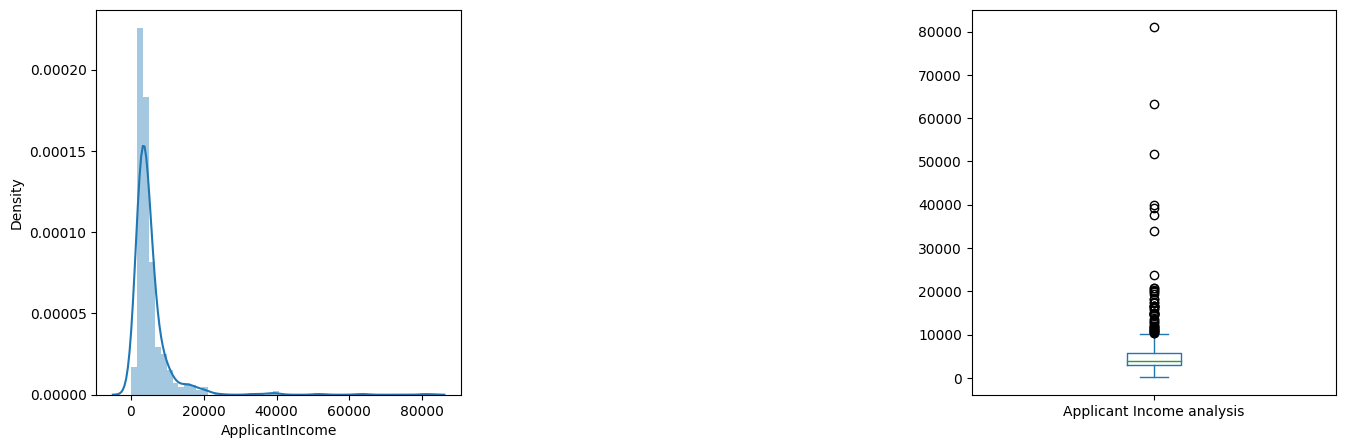

In [11]:
plt.figure(1)
plt.subplot(131)
sns.distplot(train['ApplicantIncome'],label="Applicant Income analysis")
plt.subplot(133)
train['ApplicantIncome'].plot(kind='box',figsize=(16,5),label="Applicant Income analysis")

Text(0.5, 0.98, '')

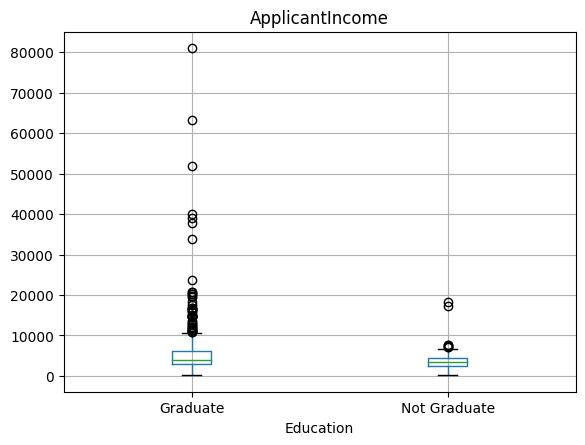

In [12]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

<ipython-input-13-622b2fb48fe8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CoapplicantIncome'])


<Axes: >

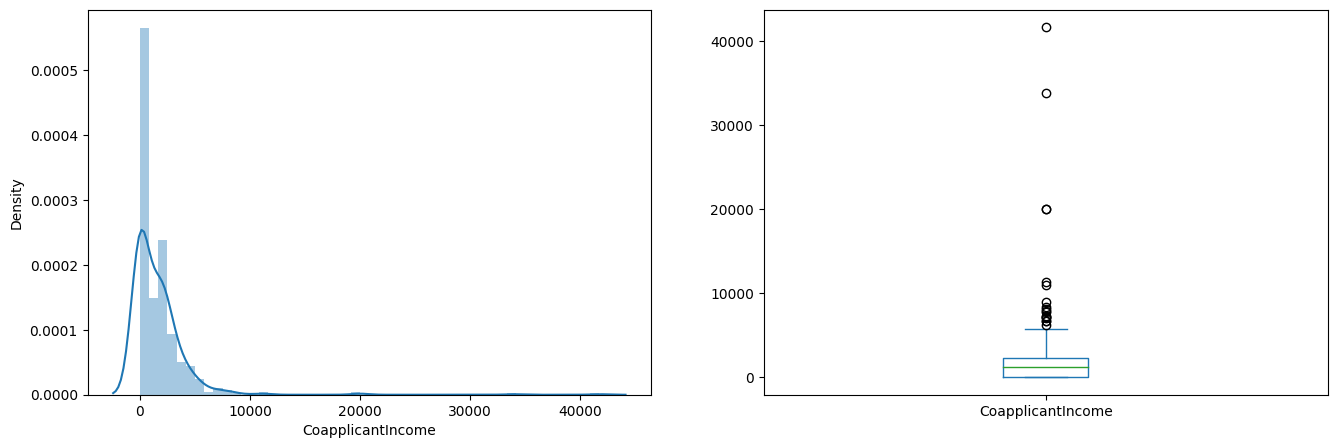

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot(kind='box', figsize=(16,5))

<ipython-input-14-5a430c67ac8e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])


<Axes: >

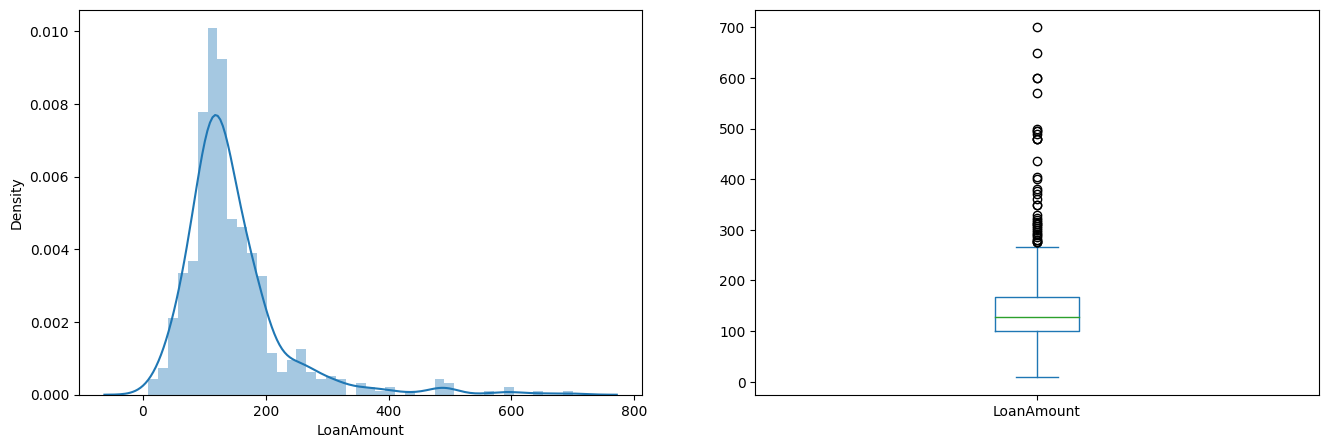

In [14]:
plt.figure()
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot(kind='box',figsize=(16,5))

Step 4 Bivariate Analysis

<Axes: xlabel='Property_Area'>

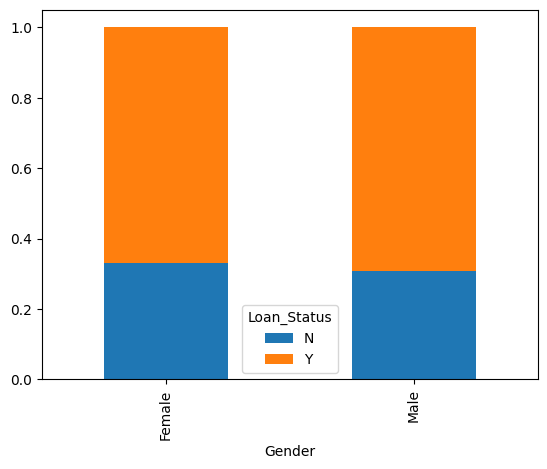

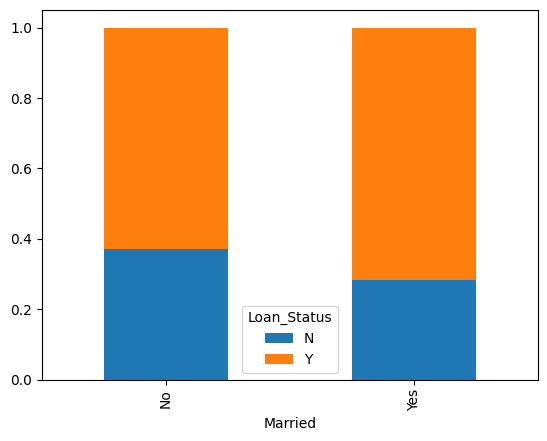

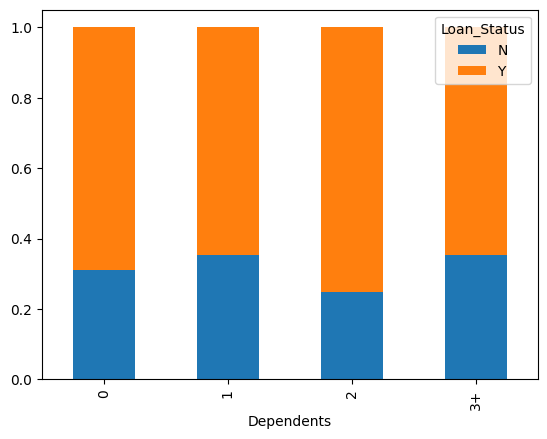

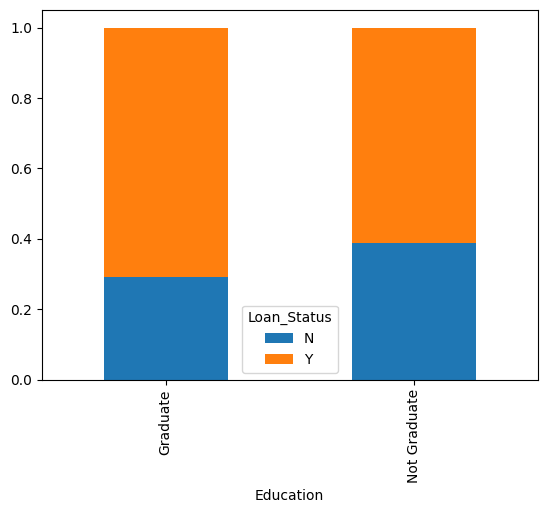

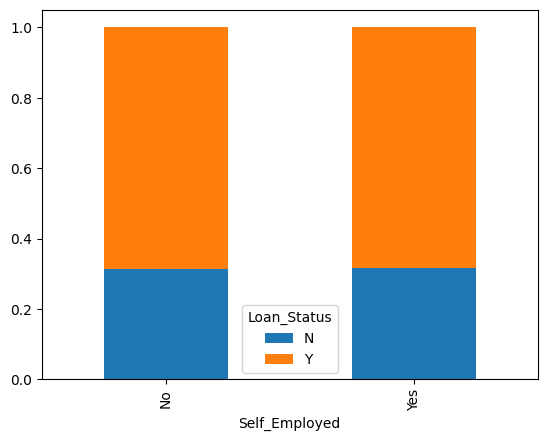

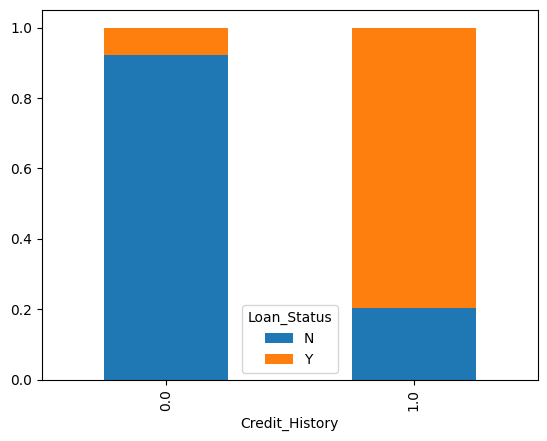

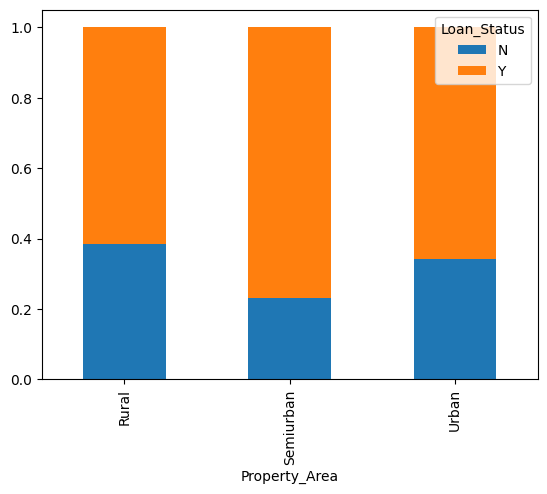

In [15]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<Axes: title={'center': 'Loan Status w.r.t Applicant Income'}, xlabel='Loan_Status'>

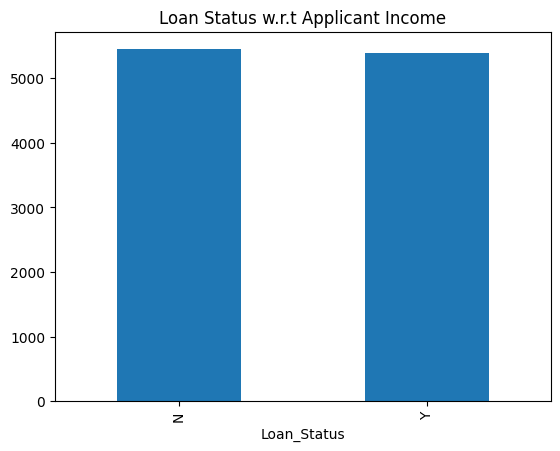

In [16]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar',title="Loan Status w.r.t Applicant Income")

In [17]:
#Declared four bins for for diff group
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


Text(0, 0.5, 'Percentage')

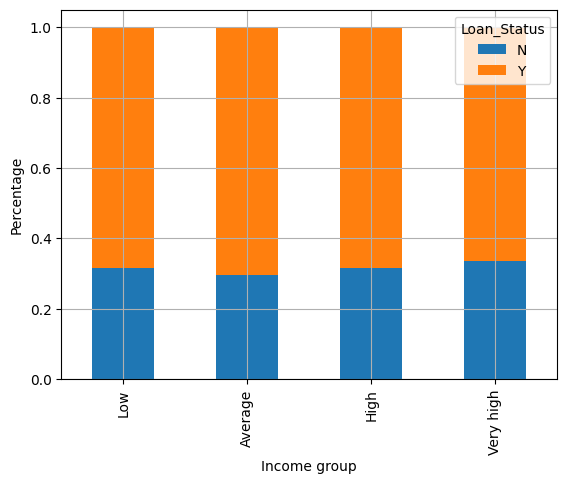

In [18]:
income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,grid=True)
plt.xlabel('Income group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

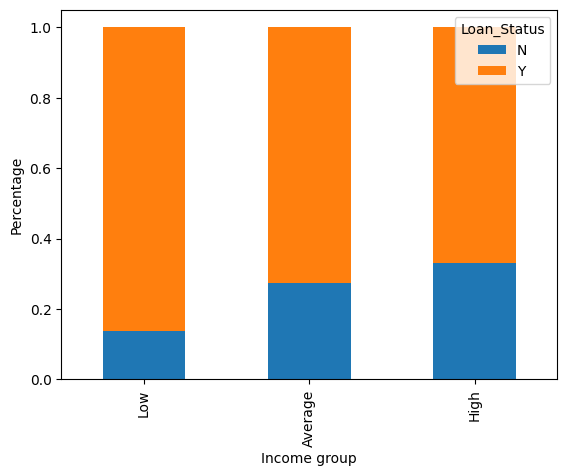

In [19]:
#train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot(kind='bar')
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Income group')
plt.ylabel('Percentage')

<Axes: xlabel='total_income_bin'>

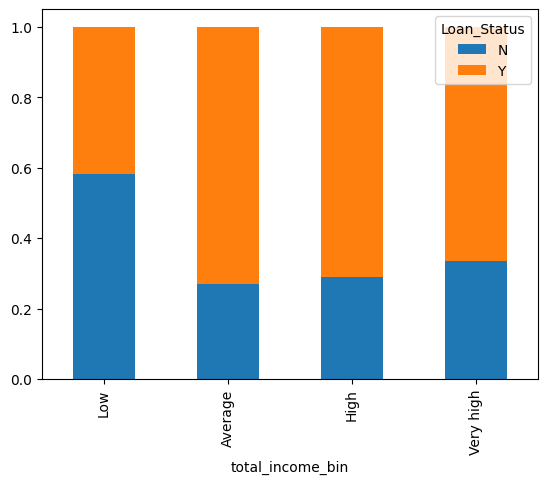

In [21]:
train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,8100]
group = ['Low','Average','High', 'Very high']
train['total_income_bin'] = pd.cut(train['total_income'],bins,labels=group)

# crosstab plot between total_income_bin vs Loasn_Status
total_income_bin = pd.crosstab(train['total_income_bin'],train['Loan_Status'])

total_income_bin.div(total_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [22]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'total_income',
       'total_income_bin'],
      dtype='object')

<ipython-input-24-92cea26e9483>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train.corr()


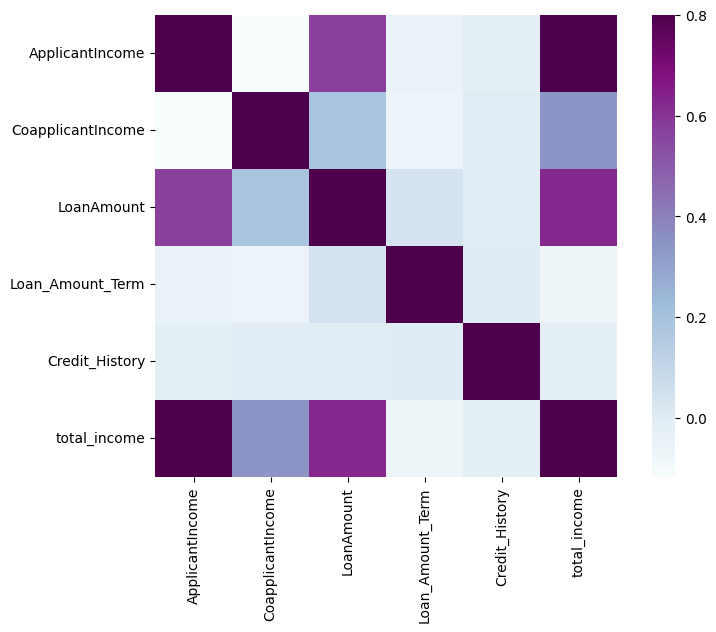

In [24]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

**Missing Value and Outlier Treatment**

In [26]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
total_income                0
total_income_bin          131
dtype: int64

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
total_income                0
total_income_bin          131
dtype: int64

In [33]:
import pandas as pd
test = pd.read_csv("/content/test_lAUu6dG.csv")

In [34]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

#----------- For Test Data
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [36]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
total_income                0
total_income_bin          131
dtype: int64

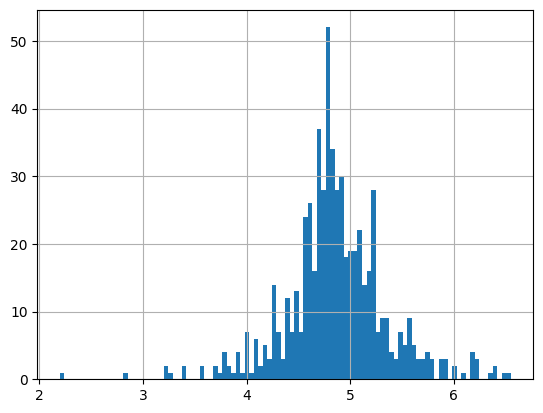

In [37]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=100)
#Below graph is approx normal distributed. For the test data set also we need to take log of LoanAmount field
#to make the distribution normal
test['LoanAmount_log'] = np.log(test['LoanAmount'])

**Model Building Part 1**
Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

In [38]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,total_income,total_income_bin,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,High,NaN,5849.0,High,4.787492
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,4.948760


In [43]:
x = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

In [44]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [45]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [46]:
#We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.
# x_cv and y_cv is validation data set component
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [48]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.
pred_cv = model.predict(x_cv)

accuracy_score(y_cv,pred_cv)

0.7837837837837838

In [69]:
train_features = model.feature_names_in_
test_features = test.columns

missing_features = set(train_features) - set(test_features)

print("Missing features:", missing_features)

Missing features: {'Coapplicant_Income_bin_Average', 'Income_bin_Low', 'Coapplicant_Income_bin_High', 'Income_bin_Very high', 'Coapplicant_Income_bin_Low', 'total_income_bin_High', 'Income_bin_High', 'total_income', 'total_income_bin_Very high', 'Income_bin_Average', 'total_income_bin_Low', 'total_income_bin_Average'}


In [70]:
for feature in missing_features:
    test[feature] = 0

test = test[train_features]

In [71]:
pred_test = model.predict(test)

In [75]:
pred_test = model.predict(test)
#Lets import result from test file.

submission=pd.read_csv("/content/sample_submission_49d68Cx.csv")
test_original = pd.read_csv("/content/test_lAUu6dG.csv")
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

**Logistic Regression using stratified k-folds cross validation**

In [74]:
#Let’s import StratifiedKFold from sklearn and fit the model.
from sklearn.model_selection import StratifiedKFold
i = 1
accuracy = []

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
#skf.get_n_splits(x,y)

for train_index,test_index in skf.split(x,y):
    #print("train: ",train_index," Validation : ",test_index)
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    x1_train,x1_val = x.iloc[train_index],x.iloc[test_index]
    y1_train,y1_val = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(max_iter=200 ,random_state=1)
    model.fit(x1_train,y1_train)
    prediction_test = model.predict(x1_val)
    score = accuracy_score(y1_val,prediction_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    #print("pred_test",pred_test)
    pred=model.predict_proba(x1_val)[:,1]
    #print("pred",pred)




1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7950819672131147


In [ ]:

submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistickfold.csv',index=False)
submission.head

<ipython-input-88-261001ade34e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Total_Income']);


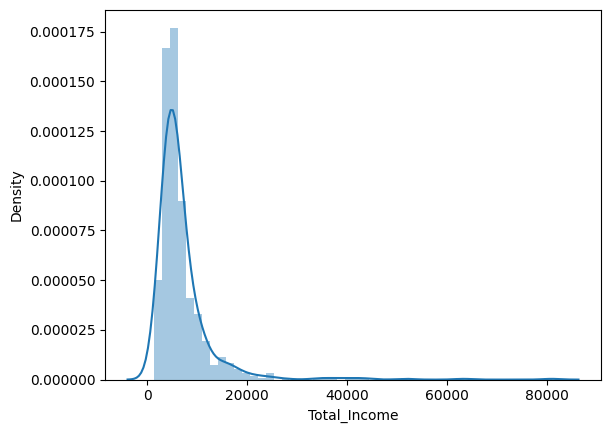

In [88]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
#Let’s check the distribution of Total Income.

sns.distplot(train['Total_Income']);

<ipython-input-89-b80a07af5ef8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Total_Income_log']);


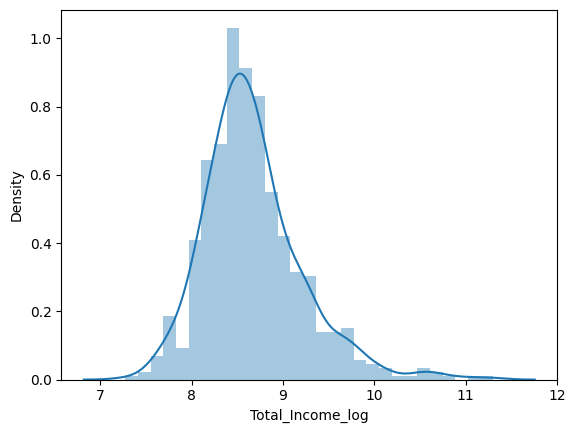

In [89]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

<ipython-input-90-25737674ebb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['EMI']);


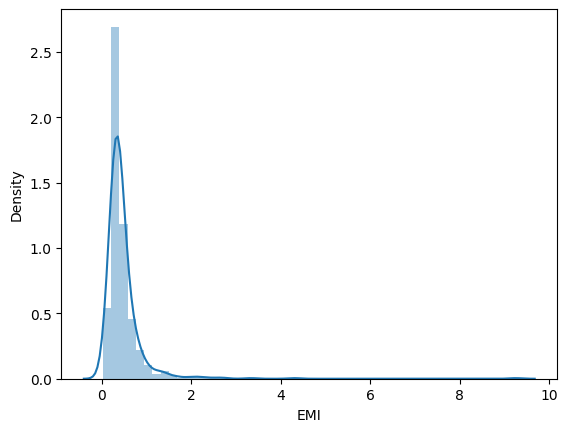

In [90]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

#Let’s check the distribution of EMI variable.

sns.distplot(train['EMI']);

<ipython-input-91-a89c603d2efd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Balance Income']);


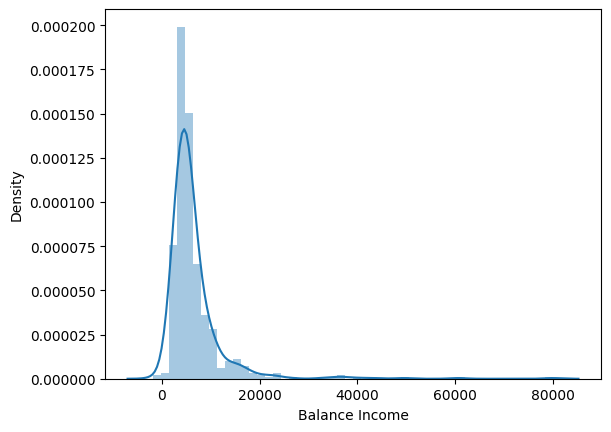

In [91]:
# us create Balance Income feature now and check its distribution.

train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

In [92]:
train_final=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test_final=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)